# Model Building

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

## Importing the dataset

In [2]:
poll_df = pd.read_csv('air_pollution_gauss_cleaned.csv') # Loading normally or gaussian distributed data
poll_df.head()

,Date,State Name,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI,Category
0,2020-01-01,Alabama,0.0,859.830216,1710.371305,3245.716331,3.535534,2.868094,0.543782,4.046470,0.033676,0.951766,3.799426e+36,223.283219,48.435555,92.363889,6.055301,Good
1,2020-01-01,California,0.0,1161.114551,2234.236335,4629.817437,4.197069,3.454464,0.639386,3.185928,0.022262,0.755213,2.689899e+36,318.449161,49.710225,93.809963,7.440329,Moderate
2,2020-01-01,Colorado,0.0,766.009791,1408.948899,2977.793038,3.201562,2.187598,0.570414,3.518695,0.038290,1.050116,5.285798e+35,327.386469,31.375000,113.998580,5.524357,Good
3,2020-01-01,Connecticut,0.0,499.490741,975.321998,1965.252528,2.280351,1.762456,0.439804,2.559934,0.024059,0.325265,3.405333e+36,195.157135,37.482143,135.210606,4.708149,Good
4,2020-01-01,Florida,0.0,1160.936691,2275.216913,4589.595448,4.427189,3.655956,0.556034,3.329852,0.030658,1.010231,4.687015e+36,343.042315,61.408333,102.174306,6.786109,Good


## Clustering

In [3]:
X = poll_df[['New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean']].values

### Finding out the optimized K value using Silhouette Method

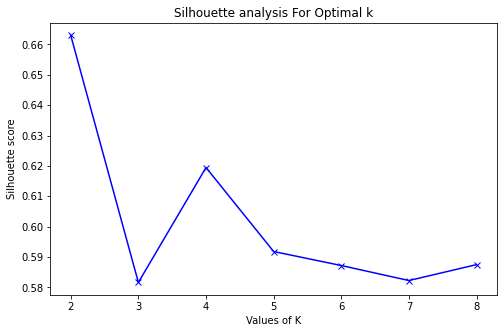

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
plt.figure(figsize=(8,5))
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')

plt.xlabel('Values of K') 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

from the above Silhouette Method, the optimal value of k = 2 

### K Means Clustering

In [6]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [7]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = poll_df[['New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean']].sample(n=k).values
    while diff:
        # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

#### Kmeans loading data

In [8]:
k = 2
centroids, cluster = kmeans(X, k)

#### Plotting the Kmeans Cluster

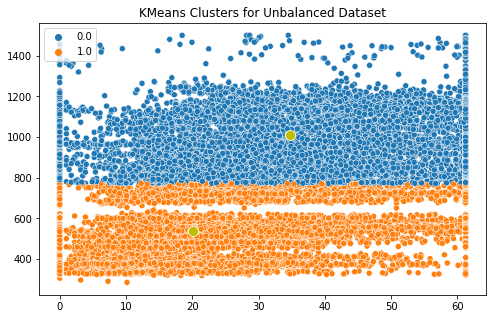

In [9]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster)
sns.scatterplot(x=centroids[:,0], y=centroids[:, 1], s=100, color='y')
plt.title('KMeans Clusters for Unbalanced Dataset')
plt.show()

### Hierarchical Agglomerative Clustering model

#### Using the dendrogram to find the optimal number of clusters

From the previous Silhouette Method we can say the best value of k is 2

#### Training

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')


#### Predicting cluster Labels

In [11]:
y_hc = hc.fit_predict(X)

#### Plotting Hierarchical Clusters

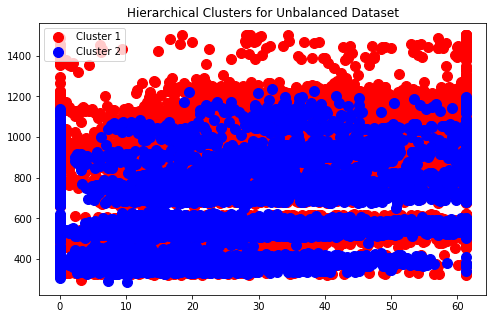

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Hierarchical Clusters for Unbalanced Dataset' )
plt.legend()
plt.show()

### Visualization of Kmeans Clusters

In [13]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
kmeans.labels_.shape

(22726,)

In [14]:
poll_df['Kmeans Cluster labels'] = pd.Series(kmeans.labels_)
poll_df.head()

,Date,State Name,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI,Category,Kmeans Cluster labels
0,2020-01-01,Alabama,0.0,859.830216,1710.371305,3245.716331,3.535534,2.868094,0.543782,4.046470,0.033676,0.951766,3.799426e+36,223.283219,48.435555,92.363889,6.055301,Good,1
1,2020-01-01,California,0.0,1161.114551,2234.236335,4629.817437,4.197069,3.454464,0.639386,3.185928,0.022262,0.755213,2.689899e+36,318.449161,49.710225,93.809963,7.440329,Moderate,1
2,2020-01-01,Colorado,0.0,766.009791,1408.948899,2977.793038,3.201562,2.187598,0.570414,3.518695,0.038290,1.050116,5.285798e+35,327.386469,31.375000,113.998580,5.524357,Good,0
3,2020-01-01,Connecticut,0.0,499.490741,975.321998,1965.252528,2.280351,1.762456,0.439804,2.559934,0.024059,0.325265,3.405333e+36,195.157135,37.482143,135.210606,4.708149,Good,1
4,2020-01-01,Florida,0.0,1160.936691,2275.216913,4589.595448,4.427189,3.655956,0.556034,3.329852,0.030658,1.010231,4.687015e+36,343.042315,61.408333,102.174306,6.786109,Good,1


In [15]:
cluster_o = poll_df[poll_df['Kmeans Cluster labels']==0]
cluster_o['State Name'].value_counts()

Tennessee        767
Wyoming          765
Nevada           761
North Dakota     759
New Mexico       755
Idaho            754
Colorado         741
Oregon           733
Utah             682
Virginia         515
Arizona          479
Alabama          472
California       271
New Hampshire    153
Washington        28
Ohio              21
Pennsylvania       7
Name: State Name, dtype: int64

In [16]:
state_names_o = list(poll_df[poll_df['Kmeans Cluster labels']==0]['State Name'].value_counts().index)
state_values_o = list(poll_df[poll_df['Kmeans Cluster labels']==0]['State Name'].value_counts().values)

state_names_1 = list(poll_df[poll_df['Kmeans Cluster labels']==1]['State Name'].value_counts().index)
state_values_1 = list(poll_df[poll_df['Kmeans Cluster labels']==1]['State Name'].value_counts().values)

#### Plotting pie chart for kmeans clusters

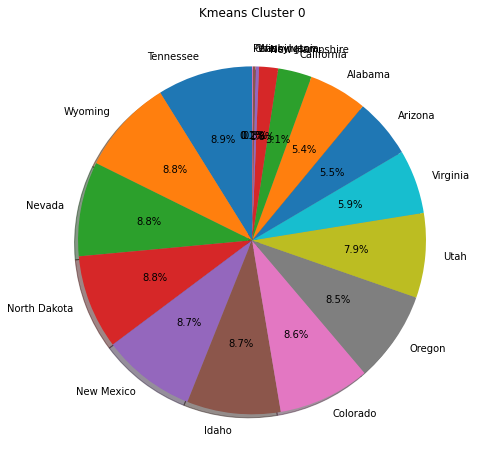

In [17]:
plt.figure(figsize=(8,8))
plt.pie(state_values_o, labels=state_names_o, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Kmeans Cluster 0')
plt.show()

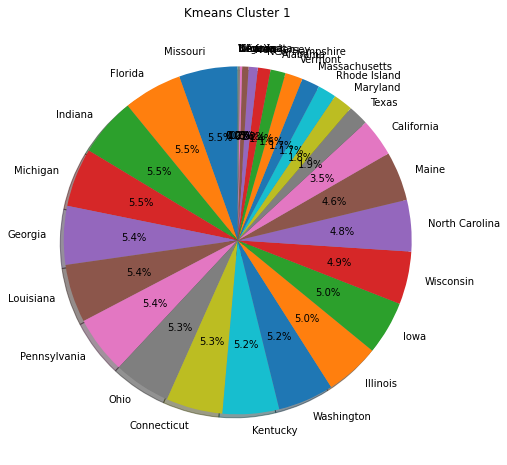

In [18]:
plt.figure(figsize=(8,8))
plt.pie(state_values_1, labels=state_names_1, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Kmeans Cluster 1')
plt.show()

In [20]:
code_names_df = pd.read_csv('state_code_name.csv')
name_code = {}
for name, code in zip(code_names_df['State Name'],code_names_df['State Code']):
    name_code[name]=code

#### Plotting Histograms for Kmeans clusters

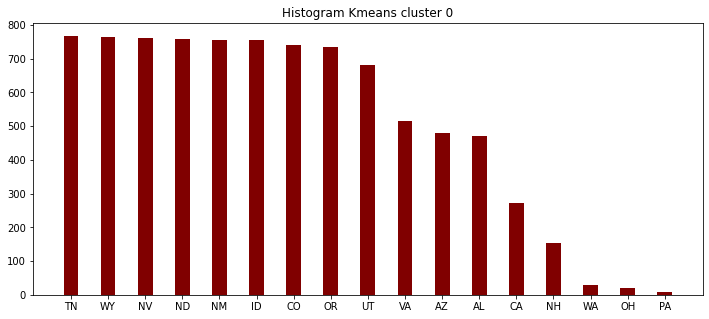

In [21]:
plt.figure(figsize=(12,5))
plt.bar(pd.Series(state_names_o).apply(lambda x: name_code[x]),state_values_o,color ='maroon',
        width = 0.4)
plt.title('Histogram Kmeans cluster 0')
plt.show()

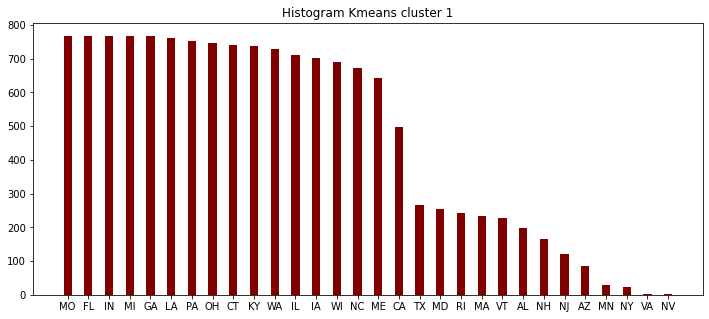

In [22]:
plt.figure(figsize=(12,5))
plt.bar(pd.Series(state_names_1).apply(lambda x: name_code[x]),state_values_1,color ='maroon',
        width = 0.4)
plt.title('Histogram Kmeans cluster 1')
plt.show()

In [23]:
poll_df['Hierarchical Cluster labels'] = pd.Series(hc.labels_)
poll_df.head()

,Date,State Name,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI,Category,Kmeans Cluster labels,Hierarchical Cluster labels
0,2020-01-01,Alabama,0.0,859.830216,1710.371305,3245.716331,3.535534,2.868094,0.543782,4.046470,0.033676,0.951766,3.799426e+36,223.283219,48.435555,92.363889,6.055301,Good,1,0
1,2020-01-01,California,0.0,1161.114551,2234.236335,4629.817437,4.197069,3.454464,0.639386,3.185928,0.022262,0.755213,2.689899e+36,318.449161,49.710225,93.809963,7.440329,Moderate,1,0
2,2020-01-01,Colorado,0.0,766.009791,1408.948899,2977.793038,3.201562,2.187598,0.570414,3.518695,0.038290,1.050116,5.285798e+35,327.386469,31.375000,113.998580,5.524357,Good,0,1
3,2020-01-01,Connecticut,0.0,499.490741,975.321998,1965.252528,2.280351,1.762456,0.439804,2.559934,0.024059,0.325265,3.405333e+36,195.157135,37.482143,135.210606,4.708149,Good,1,0
4,2020-01-01,Florida,0.0,1160.936691,2275.216913,4589.595448,4.427189,3.655956,0.556034,3.329852,0.030658,1.010231,4.687015e+36,343.042315,61.408333,102.174306,6.786109,Good,1,0


In [24]:
state_names_o = list(poll_df[poll_df['Hierarchical Cluster labels']==0]['State Name'].value_counts().index)
state_values_o = list(poll_df[poll_df['Hierarchical Cluster labels']==0]['State Name'].value_counts().values)

state_names_1 = list(poll_df[poll_df['Hierarchical Cluster labels']==1]['State Name'].value_counts().index)
state_values_1 = list(poll_df[poll_df['Hierarchical Cluster labels']==1]['State Name'].value_counts().values)

#### Plotting pie chart for Hierarchical clustering

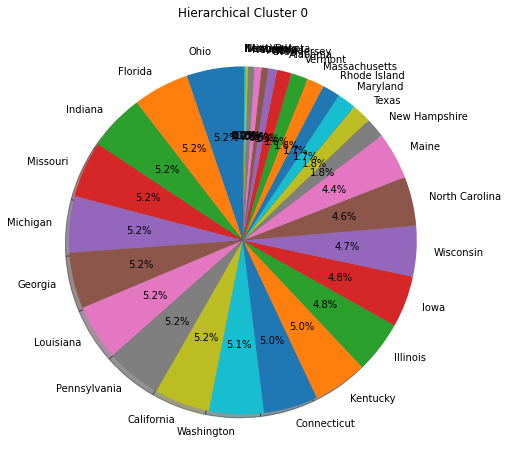

In [25]:
plt.figure(figsize=(8,8))
plt.pie(state_values_o, labels=state_names_o, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Hierarchical Cluster 0')
plt.show()

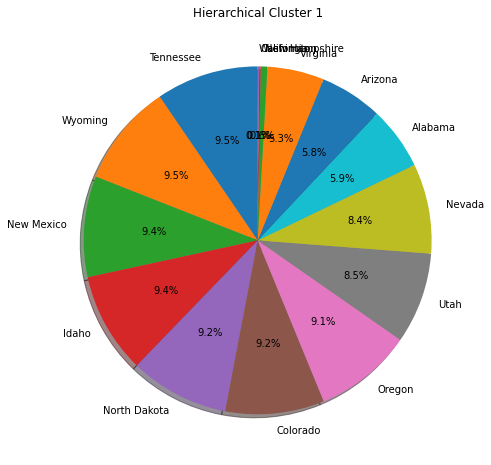

In [26]:
plt.figure(figsize=(8,8))
plt.pie(state_values_1, labels=state_names_1, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Hierarchical Cluster 1')
plt.show()

#### Plotting Histograms for Hierarchical clusters

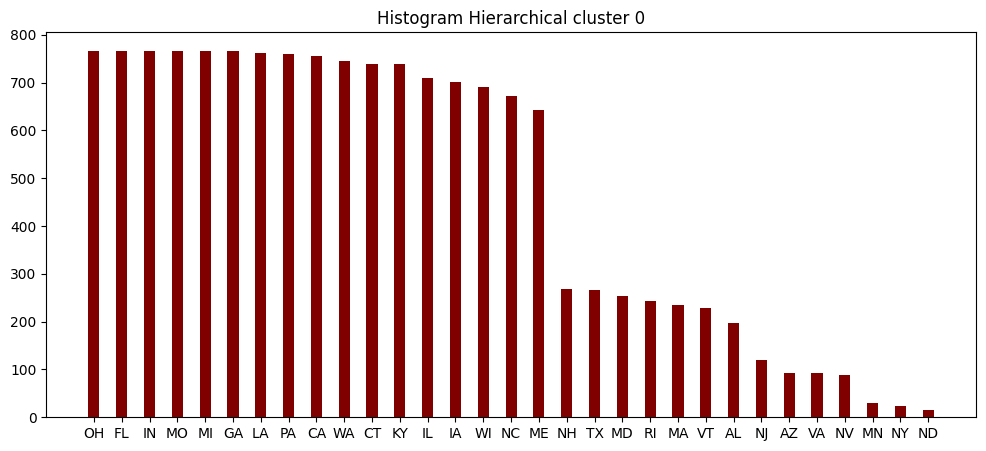

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(pd.Series(state_names_o).apply(lambda x: name_code[x]),state_values_o,color ='maroon',
        width = 0.4)
plt.title('Histogram Hierarchical cluster 0')
plt.show()

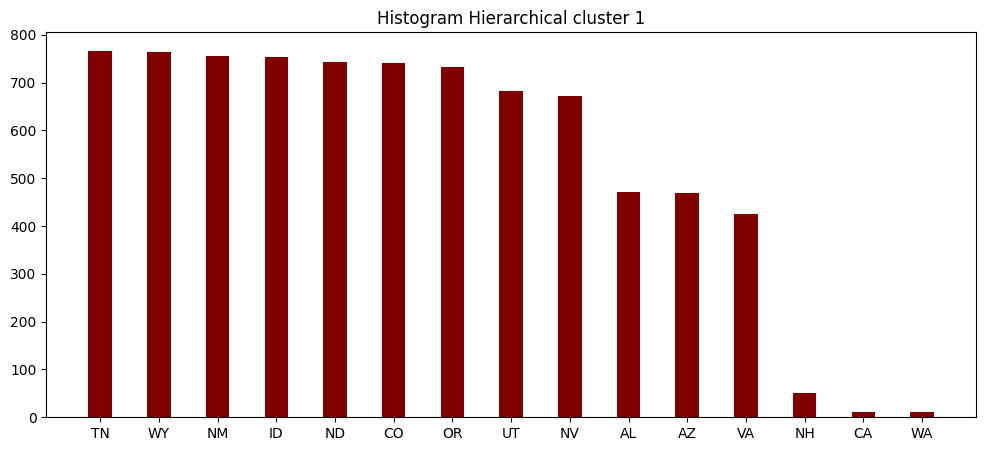

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(pd.Series(state_names_1).apply(lambda x: name_code[x]),state_values_1,color ='maroon',
        width = 0.4)
plt.title('Histogram Hierarchical cluster 1')
plt.show()